steady state water height = 9.989806320081549 m


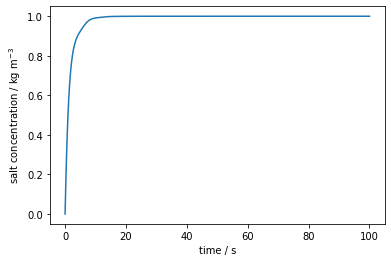

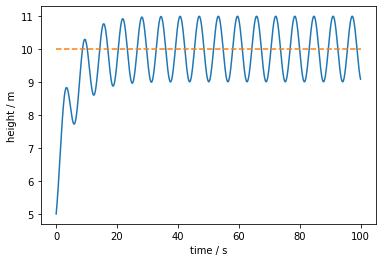

In [4]:
import numpy as np


dt = 0.1       # time step / s
nsteps = 1000  # number of time steps


A = 2.0      # cross sectional area of tank / m^2
Ka = 0.5     # product of valve coefficient K and outlet pipe cross-sectional area a / m^2
g = 9.81     # acceleration due to gravity / m s^{-2}
h0 = 5       # initial water height in tank / m
c0 = 0.0     # inital salt concentration in tank / kg m^{-3}
dotVin = 7   # inlet volumetric flow rate /  m^3 s^{-1}
cin = 1.0    # inlet salt concentration / kg m^{-3}

h_inf = (dotVin/Ka)**2 /(2.0*g)   # steady state water height
print(f'steady state water height = {h_inf} m')

# initialize lists
t_list = [0.0]    
h_list = [h0]
c_list = [c0]


# initial values of independent (t) and dependent (h and c) variables
t = 0.0
h = h0
c = c0
for step in range(nsteps):
    dotVin = 7 + 2*np.sin(t)
    Ka_t = Ka 
    hnew = h + (dotVin - Ka_t * np.sqrt(2.0*g*h) )/A * dt
    cnew = c + dotVin*(cin-c)/(A*h) * dt
    tnew = t + dt

    h_list.append(hnew)
    c_list.append(cnew)
    t_list.append(tnew)

    h = hnew
    c = cnew
    t = tnew



import pylab as plt

plt.plot(t_list, c_list)
plt.ylabel(r'salt concentration / kg m$^{-3}$')
plt.xlabel(r'time / s')
plt.show()
#plt.cla()

plt.plot(t_list, h_list)
plt.plot(t_list, [h_inf for t in t_list], ls='dashed')
plt.ylabel(r'height / m')
plt.xlabel(r'time / s')
plt.show()
